In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breakthrough-tech-ai-studio-challenge/sample_submission.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_keywords.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_metadata.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/train.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/test.csv


In [2]:
# The goal is to buid KNN
#Add more features 
#renmee features
#extract more features from the data
#treat outliers
df = pd.read_csv("/kaggle/input/breakthrough-tech-ai-studio-challenge/train.csv")
df_meta = pd.read_csv("/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_metadata.csv")

> ****Machine Learning Plan 

0. Buisness Case understanding 
1. Data Understanding  
2. Data preprocessign ( Visualization of Data, Detecting Outliers and missing values, Treating outliers, feature engineering)
3. Cleaning Data
4. Feature importance tecniques 
5. Correlation matrix 


EDA 
Goal of EDA: to clean dataset, get an understading of features, detect outliers and missing values and get the max insights on the data overall.
1. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70002 entries, 0 to 70001
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId_movieId  70002 non-null  object 
 1   rating          70002 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [4]:
df.head(3)

,userId_movieId,rating
0,10_1358,0.4
1,237_1544,0.7
2,54_373,1.0


In [5]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45383 entries, 0 to 45382
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45383 non-null  bool   
 1   belongs_to_collection  4486 non-null   object 
 2   budget                 45383 non-null  int64  
 3   genres                 45383 non-null  object 
 4   homepage               7765 non-null   object 
 5   id                     45383 non-null  int64  
 6   imdb_id                45383 non-null  object 
 7   original_language      45372 non-null  object 
 8   original_title         45383 non-null  object 
 9   overview               44433 non-null  object 
 10  popularity             45380 non-null  float64
 11  poster_path            45005 non-null  object 
 12  production_companies   45380 non-null  object 
 13  production_countries   45380 non-null  object 
 14  release_date           45302 non-null  object 
 15  re

In [6]:
df_meta.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


# **Detect and handle missing values and outliers**

In [7]:
df_meta.isnull().sum()
# budget, genres, popularity , revenue, spoken_languages, title, adult , vote_average, vote_count  

adult                        0
belongs_to_collection    40897
budget                       0
genres                       0
homepage                 37618
id                           0
imdb_id                      0
original_language           11
original_title               0
overview                   950
popularity                   3
poster_path                378
production_companies         3
production_countries         3
release_date                81
revenue                      3
runtime                    258
spoken_languages             3
status                      83
tagline                  24995
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

**Creating new datframe with the most relevant features**

In [8]:
#budget, genres, popularity , revenue, spoken_languages, title, adult , vote_average, vote_count, overview  
new_df_meta = df_meta[['budget','genres','popularity','revenue','vote_average','vote_count','original_title','overview']].copy()

# Detecting nulls 

In [9]:
new_df_meta.isnull().sum()

budget              0
genres              0
popularity          3
revenue             3
vote_average        3
vote_count          3
original_title      0
overview          950
dtype: int64

# Filling nulls with mean

In [10]:
#treat misisng values with mean for popularity 
mean = new_df_meta['popularity'].mean() 
new_df_meta['popularity'].fillna(value = mean, inplace=True)

#treat misisng values with mean revenue
mean = new_df_meta['revenue'].mean() 
new_df_meta['revenue'].fillna(value = mean, inplace=True)

#treat misisng values with mean vote_average
mean = new_df_meta['vote_average'].mean() 
new_df_meta['vote_average'].fillna(value = mean, inplace=True)

#treat misisng values with mean vote_count
mean = new_df_meta['vote_count'].mean() 
new_df_meta['vote_count'].fillna(value = mean, inplace=True)


In [11]:
#checking values again 
new_df_meta.isnull().sum()

budget              0
genres              0
popularity          0
revenue             0
vote_average        0
vote_count          0
original_title      0
overview          950
dtype: int64

# Visualization of data for spoting outliers 

[Text(0.5, 1.0, 'Box Plot of Scores')]

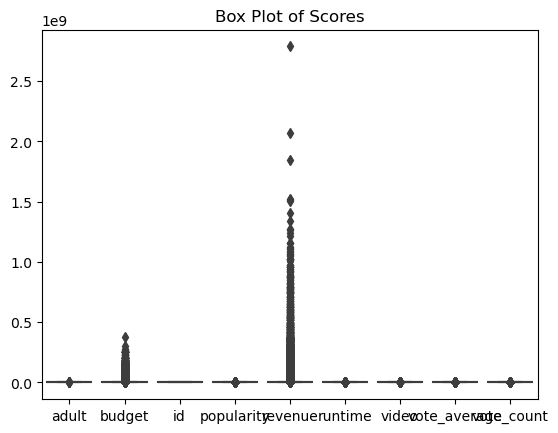

In [12]:
import seaborn as sns
sns.boxplot(data=df_meta).set(title="Box Plot of Scores")
#Outliers spotted in Budget and revenue 

[Text(0.5, 1.0, 'Box Plot of Scores')]

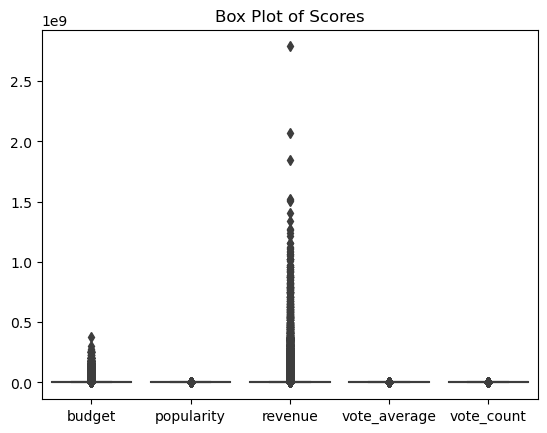

In [13]:
sns.boxplot(data=new_df_meta).set(title="Box Plot of Scores")
# according to the box plot outliers detected in revenue and budget 

<AxesSubplot:xlabel='revenue'>

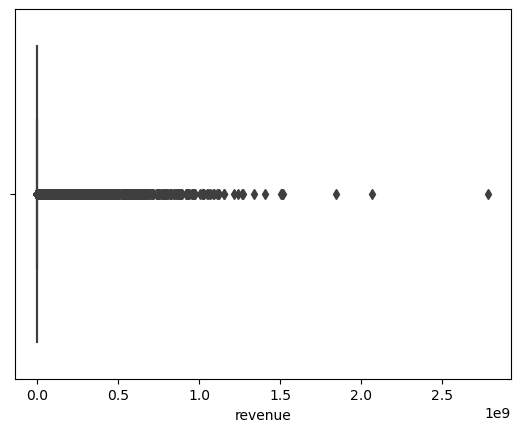

In [14]:
# I am plotting values individually for abetter picture, and as we can see - "otliers are right there 
import seaborn as sns
sns.boxplot(data=new_df_meta,x=new_df_meta['revenue'])

<AxesSubplot:xlabel='popularity'>

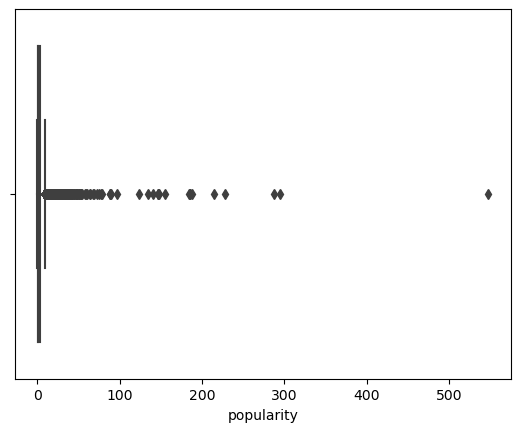

In [15]:
sns.boxplot(data=new_df_meta,x=new_df_meta['popularity'])


# Treating outliers with Q1/Q3 

In [16]:
Q1 = np.percentile(new_df_meta['popularity'], 25)
Q3 = np.percentile(new_df_meta['popularity'], 75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df_filtered = new_df_meta[(new_df_meta['popularity']>lower_limit) & (new_df_meta['popularity']<upper_limit)]


0.38707349999999996
3.688095
3.3010215


<AxesSubplot:xlabel='popularity'>

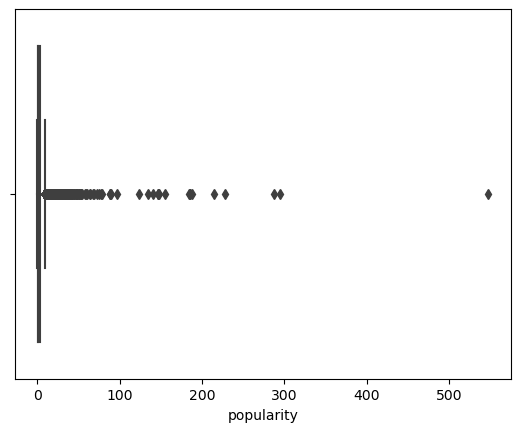

In [17]:
# I am plotting values individually for a better picture, and as we can see - otliers are right there in budget column as well
import seaborn as sns
sns.boxplot(data=new_df_meta,x=new_df_meta['popularity'])

<AxesSubplot:xlabel='popularity'>

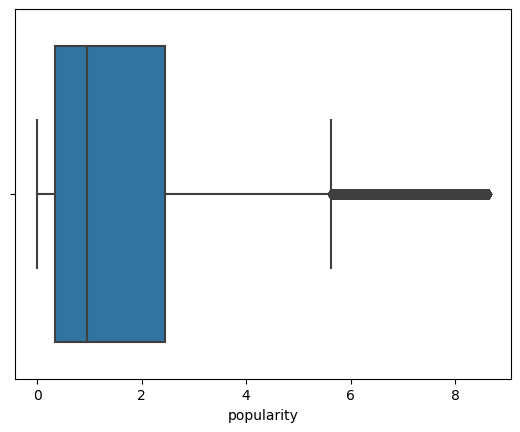

In [18]:
sns.boxplot(data=df_filtered,x=df_filtered['popularity'])
#Handeled outliers values with Q1/Q3


<AxesSubplot:xlabel='popularity'>

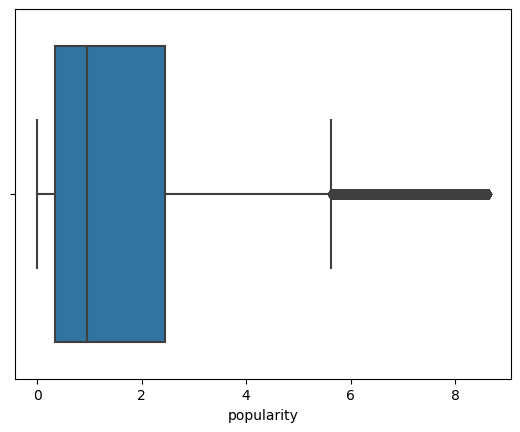

In [19]:
sns.boxplot(data=df_filtered,x=df_filtered['popularity'])


In [20]:
# Treating outliers for revenue 

Q1 = np.percentile(df_filtered['budget'], 25)
Q3 = np.percentile(df_filtered['budget'], 90)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR



0.0
1525499.9999999928
1525499.9999999928


In [21]:
df_scores_filtered = new_df_meta[(new_df_meta['budget']>lower_limit) & (new_df_meta['budget']<upper_limit)]
print(df_scores_filtered)

       budget                                             genres  popularity  \
2           0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   11.712900   
4           0                     [{'id': 35, 'name': 'Comedy'}]    8.387519   
7           0  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...    2.561161   
11          0  [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...    5.430331   
12          0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   12.140733   
...       ...                                                ...         ...   
45378       0  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...    0.072051   
45379       0                      [{'id': 18, 'name': 'Drama'}]    0.178241   
45380       0  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...    0.903007   
45381       0                                                 []    0.003503   
45382       0                                                 []    0.163015   

          revenue  vote_average  vote_c

# While plottin heatmap,  I see that budget and vote count are the most correlated.So it is a good idea to choose 'budget' as our feature  for x, since the score for correletion is one of the higest. 

<AxesSubplot:>

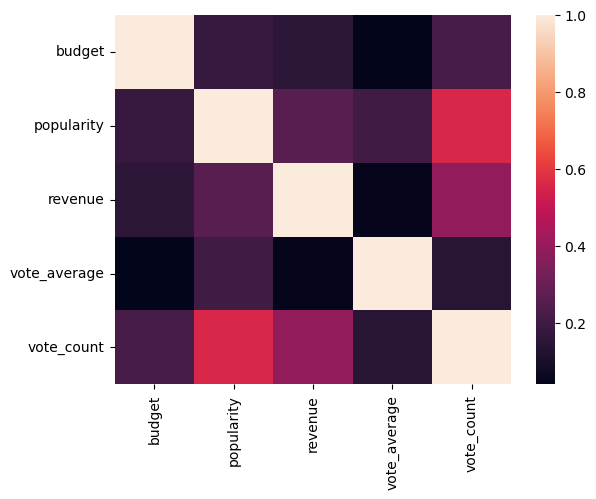

In [22]:
corr = df_scores_filtered.corr()
sns.heatmap(corr)
#Budget and vote count has the highest correlation so "budget" is the best feature 

# Data understanding for the newly created dataframe 

In [23]:
df_scores_filtered.describe()

,budget,popularity,revenue,vote_average,vote_count
count,3.959400e+04,39594.000000,3.959400e+04,39594.000000,39594.000000
mean,9.879054e+04,1.975588,9.342773e+05,5.546915,28.769491
std,4.626109e+05,2.838338,8.267676e+06,2.013755,95.204149
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.316290,0.000000e+00,5.000000,3.000000
50%,0.000000e+00,0.908912,0.000000e+00,6.000000,8.000000
75%,0.000000e+00,2.299174,0.000000e+00,6.800000,21.000000
max,3.800000e+06,67.955052,5.720000e+08,10.000000,4376.000000


In [24]:
new_df_meta.describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.538300e+04,45383.000000,4.538300e+04,45383.000000,45383.000000
mean,4.231513e+06,2.925071,1.122888e+07,5.619861,110.072212
std,1.743859e+07,6.009598,6.438510e+07,1.921156,491.708352
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.387073,0.000000e+00,5.000000,3.000000
50%,0.000000e+00,1.129397,0.000000e+00,6.000000,10.000000
75%,0.000000e+00,3.688095,0.000000e+00,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000


print(df['rating'])

In [25]:
df_filtered.columns.values

array(['budget', 'genres', 'popularity', 'revenue', 'vote_average',
       'vote_count', 'original_title', 'overview'], dtype=object)

In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 3 to 45382
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          41170 non-null  int64  
 1   genres          41170 non-null  object 
 2   popularity      41170 non-null  float64
 3   revenue         41170 non-null  float64
 4   vote_average    41170 non-null  float64
 5   vote_count      41170 non-null  float64
 6   original_title  41170 non-null  object 
 7   overview        40220 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.8+ MB


In [27]:
df_test1= pd.read_csv("/kaggle/input/breakthrough-tech-ai-studio-challenge/test.csv")

In [28]:
df_train = pd.read_csv("/kaggle/input/breakthrough-tech-ai-studio-challenge/train.csv")

In [29]:
df_test = df_test1.copy()

In [30]:
df_test1.head(1)

,userId_movieId
0,469_2124


In [31]:
df_test.head(2)

,userId_movieId
0,469_2124
1,439_3753


In [32]:
df_test.shape

(30002, 1)

In [33]:
df_filtered.shape

(41170, 8)

In [34]:
df_train[['userId','id']] = df_train.userId_movieId.str.split("_", expand=True)



In [35]:
df_train.head(2)

,userId_movieId,rating,userId,id
0,10_1358,0.4,10,1358
1,237_1544,0.7,237,1544


<AxesSubplot:xlabel='rating'>

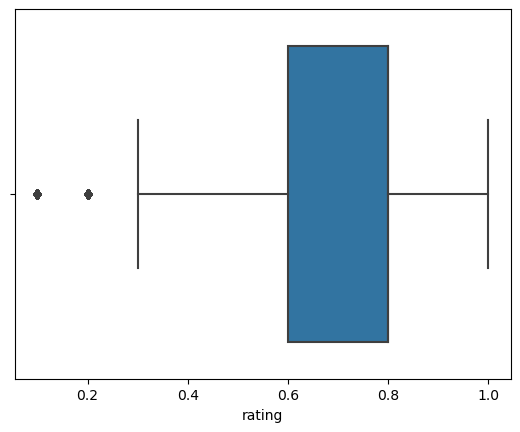

In [36]:
sns.boxplot(data=df_train,x=df_train['rating'])
#spotted outliers

In [37]:
df_train.describe()

,rating
count,70002.000000
mean,0.708891
std,0.211222
min,0.100000
25%,0.600000
50%,0.800000
75%,0.800000
max,1.000000


In [38]:
#Handle outliers 
Q1 = np.percentile(df_train['rating'], 25)
Q3 = np.percentile(df_train['rating'], 75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df_filtered = df_train[(df_train['rating']>lower_limit) & (df_train['rating']<upper_limit)]

0.6
0.8
0.20000000000000007


<AxesSubplot:xlabel='rating'>

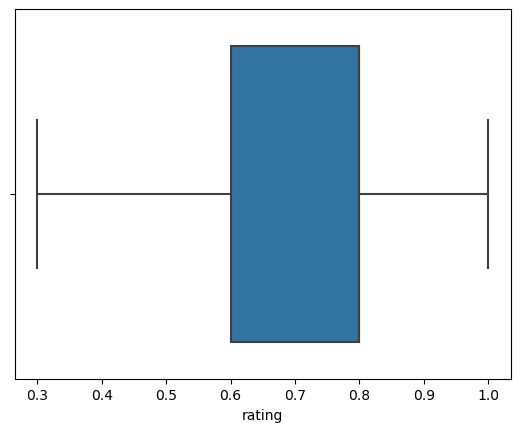

In [39]:
sns.boxplot(data=df_filtered,x=df_filtered['rating'])
#spotted outliers

In [40]:
#df_test[['userId','id']] = df_test.userId_movieId.str.split("_", expand=True)
#df_test.head(2)


In [41]:
#df_test = df_test.drop(['userId_movieId'], axis=1)

In [42]:
df_test.shape

(30002, 1)

In [43]:
df_test.head(3)

,userId_movieId
0,469_2124
1,439_3753
2,522_1682


In [44]:
df_filtered.head(2)

,userId_movieId,rating,userId,id
0,10_1358,0.4,10,1358
1,237_1544,0.7,237,1544


In [45]:
df_test.head(2)

,userId_movieId
0,469_2124
1,439_3753


In [46]:
#df_test[['userId','id']] = df_test.userId_movieId.str.split("_", expand=True)

# Choosing features for *X* ['user_id', 'movie_id', 'budget'] and *y* for our label (What we want to predict - which is hwo user like the movie, 'rating')

In [47]:
#features = ["userId","id"]
X = df_filtered['userId_movieId']
y =df_filtered['rating']
X_test = df_test['userId_movieId']

In [48]:
y.shape

(66938,)

In [49]:
X.shape

(66938,)

In [50]:
X_test.shape

(30002,)

In [51]:
X = X.values.reshape(-1,1)

In [52]:
X.shape

(66938, 1)

In [53]:
X_test = df_test['userId_movieId']

In [54]:
X_test.shape

(30002,)

In [55]:
from sklearn.neighbors import KNeighborsRegressor
modelk = KNeighborsRegressor(n_neighbors=5)
modelk.fit(X, y)

KNeighborsRegressor()

In [56]:
X_test = X_test.values.reshape(-1,1)

In [57]:
pred_k = modelk.predict(X_test)

In [58]:
y =y.values.reshape(-1,1)


In [59]:
pred_k = pred_k.reshape(-1,1)

In [60]:
y.shape

(66938, 1)

In [61]:
pred_k.shape

(30002, 1)

In [62]:
#from sklearn.metrics import accuracy_score 
#modelk.score(y, pred_k, sample_weight=None)
#ValueError: X has 1 features, but KNeighborsRegressor is expecting 2 features as input.

In [63]:
X_test.shape

(30002, 1)

In [64]:
#create DF using userID as base which was x_test

# Import pandas library
import pandas as pd
  
# initialize list elements
  
# Create the pandas DataFrame with column name is provided explicitly
df_final = pd.DataFrame(df_test['userId_movieId'], columns=['userId_movieId'])

  
# print dataframe.
df_final.head(2)

,userId_movieId
0,469_2124
1,439_3753


In [65]:
df_final['rating'] = pred_k

In [66]:
df_final.head(2)

,userId_movieId,rating
0,469_2124,0.76
1,439_3753,0.68


In [67]:
df_final.to_csv("submission.csv", index=False)

In [68]:
# I spotted an dtreated outliers 
#trieds split 2 features
#trieds use a 1